In [1]:
# read nc output from WAOM 4km run and plot TS diagrams for East Antarctica sections

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps
import matplotlib as mpl
#mpl.use('Agg')

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import iris
import iris.iterate
import iris.coords
import iris.plot as iplt
import gsw

In [2]:
# make grid for density contours
smin = 30 - (0.01 * 30)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 36. + (0.01 * 36.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -4. + (0.1 * -4.)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 5 + (0.1 * 5.)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 30
ydim = 20
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-4,5,ydim)
si = np.linspace(31,36,xdim)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],0)
        # Substract 1000 to convert to sigma-0
dens = dens - 1000
print(np.max(dens),np.min(dens))

tmin, tmax, smin, smax sizes=, -4.4 5.5 29.7 36.36
28.89376247921109 24.395526779493366


In [3]:
# load vars for TS plot
count = 0
monthly_ind_ini = [0, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67]
monthly_ind_end = [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 73]

# load grid to get lat_rho for sections:
dx = xr.open_dataset("/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc")
lat_rho10 = dx.variables["lat_rho"]
lon_rho10 = dx.variables["lon_rho"]
dx.close()

# WAOM10extend

WWed10 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM10extend_shflim_S_sec_WWed_5days_annual.nc'
print(WWed10)
z_rho_WWed10_tmp = iris.load_cube(WWed10, 'z_rho')
temp_WWed10_tmp = iris.load_cube(WWed10, 'time-averaged potential temperature')
salt_WWed10_tmp = iris.load_cube(WWed10, 'time-averaged salinity')
temp_WWed10 = temp_WWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_WWed10 = salt_WWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_WWed10 = z_rho_WWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_WWed10 = z_rho_WWed10.coord('bathymetry at RHO-points').points
rho_WWed10 = gsw.rho(xr.DataArray.from_iris(salt_WWed10),xr.DataArray.from_iris(temp_WWed10),0) - 1000
lat_WWed10_tmp = dx.lat_rho.isel(xi_rho=175, eta_rho=slice(320,440))
z_rho_WWed10b = xr.DataArray.from_iris(z_rho_WWed10)
z_WWed10_mask = ma.array(z_rho_WWed10b,mask=np.isnan(z_rho_WWed10b))
lat_WWed10 = np.ones((31,120))
for ii in np.arange(0,31):
    lat_WWed10[ii,:] = lat_WWed10_tmp
lat_WWed10_mask =  ma.array(lat_WWed10,mask=np.isnan(lat_WWed10))
print(temp_WWed10_tmp.shape,salt_WWed10_tmp.shape,depth_WWed10.shape, temp_WWed10.shape, z_rho_WWed10.shape, depth_WWed10.shape)

EWed10 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM10extend_shflim_S_sec_EWed_5days_annual.nc'
print(EWed10)
z_rho_EWed10_tmp = iris.load_cube(EWed10, 'z_rho')
temp_EWed10_tmp = iris.load_cube(EWed10, 'time-averaged potential temperature')
salt_EWed10_tmp = iris.load_cube(EWed10, 'time-averaged salinity')
temp_EWed10 = temp_EWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_EWed10 = salt_EWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_EWed10 = z_rho_EWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_EWed10 = z_rho_EWed10.coord('bathymetry at RHO-points').points
rho_EWed10 = gsw.rho(xr.DataArray.from_iris(salt_EWed10),xr.DataArray.from_iris(temp_EWed10),0) - 1000
lat_EWed10_tmp = dx.lat_rho.isel(xi_rho=200, eta_rho=slice(330,450))
z_rho_EWed10b = xr.DataArray.from_iris(z_rho_EWed10)
z_EWed10_mask = ma.array(z_rho_EWed10b,mask=np.isnan(z_rho_EWed10b))
lat_EWed10 = np.ones((31,120))
for ii in np.arange(0,31):
    lat_EWed10[ii,:] = lat_EWed10_tmp
lat_EWed10_mask =  ma.array(lat_EWed10,mask=np.isnan(lat_EWed10))
print(temp_EWed10_tmp.shape,salt_EWed10_tmp.shape,depth_EWed10.shape, temp_EWed10.shape, z_rho_EWed10.shape, depth_EWed10.shape)



/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM10extend_shflim_S_sec_WWed_5days_annual.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(73, 31, 120) (73, 31, 120) (120,) (31, 120) (31, 120) (120,)
/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM10extend_shflim_S_sec_EWed_5days_annual.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(73, 31, 120) (73, 31, 120) (120,) (31, 120) (31, 120) (120,)


In [4]:
# load grid to get lat_rho for sections:
dx = xr.open_dataset("/scratch/project_2000789/boeiradi/waom4_frc/waom4extend_grd.nc")
lat_rho4 = dx.variables["lat_rho"]
lon_rho4 = dx.variables["lon_rho"]
dx.close()

# WAOM4extend
WWed4 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM4extend_shflim_S_sec_WWed_5days_annual.nc'
print(WWed4)
z_rho_WWed4_tmp = iris.load_cube(WWed4, 'z_rho')
temp_WWed4_tmp = iris.load_cube(WWed4, 'time-averaged potential temperature')
salt_WWed4_tmp = iris.load_cube(WWed4, 'time-averaged salinity')
temp_WWed4 = temp_WWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_WWed4 = salt_WWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_WWed4 = z_rho_WWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_WWed4 = z_rho_WWed4.coord('bathymetry at RHO-points').points
rho_WWed4 = gsw.rho(xr.DataArray.from_iris(salt_WWed4),xr.DataArray.from_iris(temp_WWed4),0) - 1000
lat_WWed4_tmp = dx.lat_rho.isel(xi_rho=438, eta_rho=slice(800,1100))
z_rho_WWed4b = xr.DataArray.from_iris(z_rho_WWed4)
z_WWed4_mask = ma.array(z_rho_WWed4b,mask=np.isnan(z_rho_WWed4b))
lat_WWed4 = np.ones((31,300))
for ii in np.arange(0,31):
    lat_WWed4[ii,:] = lat_WWed4_tmp
lat_WWed4_mask =  ma.array(lat_WWed4,mask=np.isnan(lat_WWed4))
print(temp_WWed4_tmp.shape,salt_WWed4_tmp.shape,depth_WWed4.shape, temp_WWed4.shape, z_rho_WWed4.shape, depth_WWed4.shape)

EWed4 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM4extend_shflim_S_sec_EWed_5days_annual.nc'
print(EWed4)
z_rho_EWed4_tmp = iris.load_cube(EWed4, 'z_rho')
temp_EWed4_tmp = iris.load_cube(EWed4, 'time-averaged potential temperature')
salt_EWed4_tmp = iris.load_cube(EWed4, 'time-averaged salinity')
temp_EWed4 = temp_EWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_EWed4 = salt_EWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_EWed4 = z_rho_EWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_EWed4 = z_rho_EWed4.coord('bathymetry at RHO-points').points
rho_EWed4 = gsw.rho(xr.DataArray.from_iris(salt_EWed4),xr.DataArray.from_iris(temp_EWed4),0) - 1000
lat_EWed4_tmp = dx.lat_rho.isel(xi_rho=500, eta_rho=slice(825,1125))
z_rho_EWed4b = xr.DataArray.from_iris(z_rho_EWed4)
z_EWed4_mask = ma.array(z_rho_EWed4b,mask=np.isnan(z_rho_EWed4b))
lat_EWed4 = np.ones((31,300))
for ii in np.arange(0,31):
    lat_EWed4[ii,:] = lat_EWed4_tmp
lat_EWed4_mask =  ma.array(lat_EWed4,mask=np.isnan(lat_EWed4))
print(temp_EWed4_tmp.shape,salt_EWed4_tmp.shape,depth_EWed4.shape, temp_EWed4.shape, z_rho_EWed4.shape, depth_EWed4.shape)


/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM4extend_shflim_S_sec_WWed_5days_annual.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(73, 31, 300) (73, 31, 300) (300,) (31, 300) (31, 300) (300,)
/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM4extend_shflim_S_sec_EWed_5days_annual.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(73, 31, 300) (73, 31, 300) (300,) (31, 300) (31, 300) (300,)


In [5]:
# load grid to get lat_rho for sections:
dx = xr.open_dataset("/scratch/project_2000339/boeiradi/waom2_frc/waom2extend_grd.nc")
lat_rho2 = dx.variables["lat_rho"]
lon_rho2 = dx.variables["lon_rho"]
dx.close()

# WAOM2extend
WWed2 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM2extend_shflim_S_sec_WWed_5days_annual.nc'
print(WWed2)
z_rho_WWed2_tmp = iris.load_cube(WWed2, 'z_rho')
temp_WWed2_tmp = iris.load_cube(WWed2, 'time-averaged potential temperature')
salt_WWed2_tmp = iris.load_cube(WWed2, 'time-averaged salinity')
temp_WWed2 = temp_WWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_WWed2 = salt_WWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_WWed2 = z_rho_WWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_WWed2 = z_rho_WWed2.coord('bathymetry at RHO-points').points
rho_WWed2 = gsw.rho(xr.DataArray.from_iris(salt_WWed2),xr.DataArray.from_iris(temp_WWed2),0) - 1000
lat_WWed2_tmp = dx.lat_rho.isel(xi_rho=875, eta_rho=slice(1600,2200))
z_rho_WWed2b = xr.DataArray.from_iris(z_rho_WWed2)
z_WWed2_mask = ma.array(z_rho_WWed2b,mask=np.isnan(z_rho_WWed2b))
lat_WWed2 = np.ones((31,600))
for ii in np.arange(0,31):
    lat_WWed2[ii,:] = lat_WWed2_tmp
lat_WWed2_mask =  ma.array(lat_WWed2,mask=np.isnan(lat_WWed2))
print(temp_WWed2_tmp.shape,salt_WWed2_tmp.shape,depth_WWed2.shape, temp_WWed2.shape, z_rho_WWed2.shape, depth_WWed2.shape)

EWed2 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM2extend_shflim_S_sec_EWed_5days_annual.nc'
print(EWed2)
z_rho_EWed2_tmp = iris.load_cube(EWed2, 'z_rho')
temp_EWed2_tmp = iris.load_cube(EWed2, 'time-averaged potential temperature')
salt_EWed2_tmp = iris.load_cube(EWed2, 'time-averaged salinity')
temp_EWed2 = temp_EWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_EWed2 = salt_EWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_EWed2 = z_rho_EWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_EWed2 = z_rho_EWed2.coord('bathymetry at RHO-points').points
rho_EWed2 = gsw.rho(xr.DataArray.from_iris(salt_EWed2),xr.DataArray.from_iris(temp_EWed2),0) - 1000
lat_EWed2_tmp = dx.lat_rho.isel(xi_rho=1000, eta_rho=slice(1650,2250))
z_rho_EWed2b = xr.DataArray.from_iris(z_rho_EWed2)
z_EWed2_mask = ma.array(z_rho_EWed2b,mask=np.isnan(z_rho_EWed2b))
lat_EWed2 = np.ones((31,600))
for ii in np.arange(0,31):
    lat_EWed2[ii,:] = lat_EWed2_tmp
lat_EWed2_mask =  ma.array(lat_EWed2,mask=np.isnan(lat_EWed2))
print(temp_EWed2_tmp.shape,salt_EWed2_tmp.shape,depth_EWed2.shape, temp_EWed2.shape, z_rho_EWed2.shape, depth_EWed2.shape)

/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM2extend_shflim_S_sec_WWed_5days_annual.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(12, 31, 600) (12, 31, 600) (600,) (31, 600) (31, 600) (600,)
/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM2extend_shflim_S_sec_EWed_5days_annual.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(12, 31, 600) (12, 31, 600) (600,) (31, 600) (31, 600) (600,)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

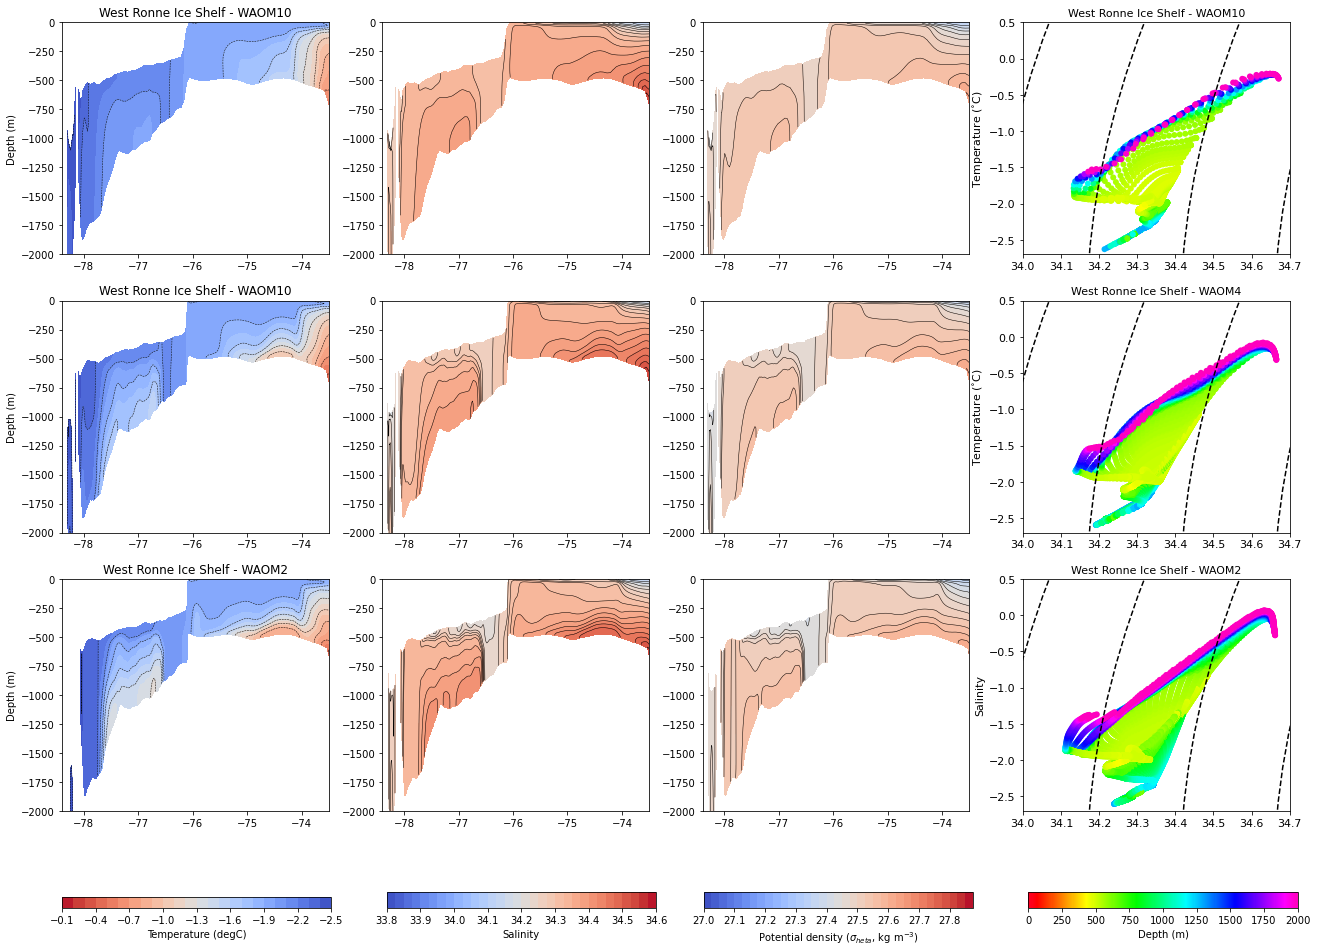

In [8]:
# fig cross-sections + ts digrams RF-RIS regions

# Plot transects
levelsT = np.arange(-2.5,0.,.1)
levelsTf = np.arange(-2.5,0.,.2)
levelsS = np.arange(33.8,34.6,.025)
levelsSf = np.arange(33.8,34.6,.025)
levelsR = np.arange(27.,27.9,.025)
levelsRf = np.arange(27.,27.9,.025)

#f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 7))
fig = plt.figure(figsize=(22,15))
ax1 = fig.add_subplot(3,4,1)
ct = plt.contourf(lat_WWed10_mask, z_WWed10_mask, xr.DataArray.from_iris(temp_WWed10), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed10_mask, z_WWed10_mask, xr.DataArray.from_iris(temp_WWed10), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-78.4,-73.5])
plt.ylim([-2000,0])
plt.title('West Ronne Ice Shelf - WAOM10')
plt.ylabel('Depth (m)')
# plt.xlabel('Latitude')

ax2 = fig.add_subplot(3,4,2)
#xr.DataArray.from_iris(salt_WWed10.plot(levels=levelsS)
cs = plt.contourf(lat_WWed10_mask, z_WWed10_mask, xr.DataArray.from_iris(salt_WWed10), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_WWed10_mask, z_WWed10_mask, xr.DataArray.from_iris(salt_WWed10), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-78.4,-73.5])
plt.ylim([-2000,0])

ax3 = fig.add_subplot(3,4,3)
cr = plt.contourf(lat_WWed10_mask, z_WWed10_mask, rho_WWed10, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed10_mask, z_WWed10_mask, rho_WWed10, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-78.4,-73.5])
plt.ylim([-2000,0])

ax5 = fig.add_subplot(3,4,5)
ct = plt.contourf(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(temp_WWed4), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(temp_WWed4), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-78.4,-73.5])
plt.ylim([-2000,0])
plt.title('West Ronne Ice Shelf - WAOM10')
plt.ylabel('Depth (m)') # minus is height not depth!

ax6 = fig.add_subplot(3,4,6)
cs = plt.contourf(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(salt_WWed4), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(salt_WWed4), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-78.4,-73.5])
plt.ylim([-2000,0])

ax7 = fig.add_subplot(3,4,7)
cr = plt.contourf(lat_WWed4_mask, z_WWed4_mask, rho_WWed4, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed4_mask, z_WWed4_mask, rho_WWed4, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-78.4,-73.5])
plt.ylim([-2000,0])

ax9 = fig.add_subplot(3,4,9)
ct = plt.contourf(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(temp_WWed2), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(temp_WWed2), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-78.4,-73.5])
plt.ylim([-2000,0])
plt.title('West Ronne Ice Shelf - WAOM2')
plt.ylabel('Depth (m)')

ax10 = fig.add_subplot(3,4,10)
cs = plt.contourf(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(salt_WWed2), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(salt_WWed2), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-78.4,-73.5])
plt.ylim([-2000,0])

ax11 = fig.add_subplot(3,4,11)
cr = plt.contourf(lat_WWed2_mask, z_WWed2_mask, rho_WWed2, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed2_mask, z_WWed2_mask, rho_WWed2, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-78.4,-73.5])
plt.ylim([-2000,0])

cbar_ax1 = fig.add_axes([0.125, 0.06, 0.17, 0.01])
cbt = fig.colorbar(ct, cax=cbar_ax1, orientation='horizontal')#plt.colorbar(ct, extend='both')
cbt.ax.set_xlabel('Temperature (degC)')
cbar_ax2 = fig.add_axes([0.33, 0.06, 0.17, 0.015])
cbs = fig.colorbar(cs, cax=cbar_ax2, orientation='horizontal')
cbs.ax.set_xlabel('Salinity')
cbar_ax3 = fig.add_axes([0.53, 0.06, 0.17, 0.015])
cbr = fig.colorbar(cr, cax=cbar_ax3, orientation='horizontal')
cbr.ax.set_xlabel('Potential density ($\sigma_{\theta}$, kg m$^{-3}$)')

# ts-diagram
plt.subplot(3,4,4)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_WWed10, temp_WWed10, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_WWed10, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=2000)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,0.5])
plt.title('West Ronne Ice Shelf - WAOM10', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.2),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')

plt.subplot(3,4,8)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_WWed4, temp_WWed4, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_WWed4, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=2000)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,0.5])
plt.title('West Ronne Ice Shelf - WAOM4', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.2),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')

plt.subplot(3,4,12)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_WWed2, temp_WWed2, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_WWed2, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=2000)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_ylabel('Salinity', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,0.5])
plt.title('West Ronne Ice Shelf - WAOM2', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.2),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')

cbar_ax4 = fig.add_axes([0.735, 0.06, 0.17, 0.015])
cbts = fig.colorbar(scat, cax=cbar_ax4, orientation='horizontal')
cbts.ax.set_xlabel('Depth (m)')

fig_path='/users/boeiradi/COLD_project/postprocessing/figs/TS_diagrams/'
name_fig="waom10x4x2extend_shflim_S_0.25Q_RFISsectionW_TSdiag+sections.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

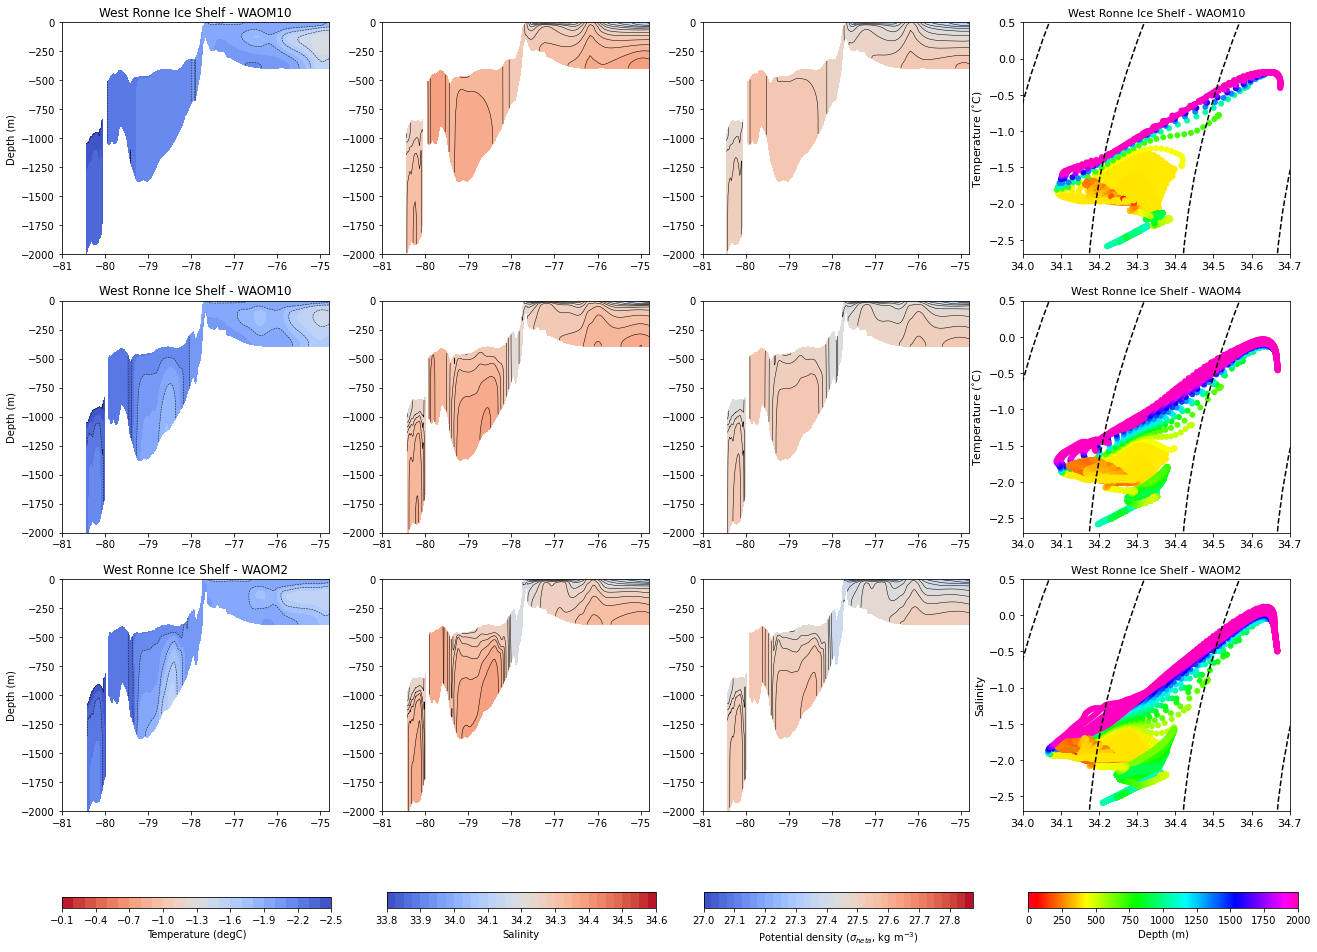

In [11]:
# fig cross-sections + ts digrams RF-RIS regions

# Plot transects
levelsT = np.arange(-2.5,0.,.1)
levelsTf = np.arange(-2.5,0.,.2)
levelsS = np.arange(33.8,34.6,.025)
levelsSf = np.arange(33.8,34.6,.025)
levelsR = np.arange(27.,27.9,.025)
levelsRf = np.arange(27.,27.9,.025)

#f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 7))
fig = plt.figure(figsize=(22,15))
ax1 = fig.add_subplot(3,4,1)
ct = plt.contourf(lat_EWed10_mask, z_EWed10_mask, xr.DataArray.from_iris(temp_EWed10), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_EWed10_mask, z_EWed10_mask, xr.DataArray.from_iris(temp_EWed10), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-81,-74.8])
plt.ylim([-2000,0])
plt.title('West Ronne Ice Shelf - WAOM10')
plt.ylabel('Depth (m)')
# plt.xlabel('Latitude')

ax2 = fig.add_subplot(3,4,2)
#xr.DataArray.from_iris(salt_EWed10.plot(levels=levelsS)
cs = plt.contourf(lat_EWed10_mask, z_EWed10_mask, xr.DataArray.from_iris(salt_EWed10), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_EWed10_mask, z_EWed10_mask, xr.DataArray.from_iris(salt_EWed10), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-81,-74.8])
plt.ylim([-2000,0])

ax3 = fig.add_subplot(3,4,3)
cr = plt.contourf(lat_EWed10_mask, z_EWed10_mask, rho_EWed10, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_EWed10_mask, z_EWed10_mask, rho_EWed10, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-81,-74.8])
plt.ylim([-2000,0])

ax5 = fig.add_subplot(3,4,5)
ct = plt.contourf(lat_EWed4_mask, z_EWed4_mask, xr.DataArray.from_iris(temp_EWed4), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_EWed4_mask, z_EWed4_mask, xr.DataArray.from_iris(temp_EWed4), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-81,-74.8])
plt.ylim([-2000,0])
plt.title('West Ronne Ice Shelf - WAOM10')
plt.ylabel('Depth (m)') # minus is height not depth!

ax6 = fig.add_subplot(3,4,6)
cs = plt.contourf(lat_EWed4_mask, z_EWed4_mask, xr.DataArray.from_iris(salt_EWed4), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_EWed4_mask, z_EWed4_mask, xr.DataArray.from_iris(salt_EWed4), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-81,-74.8])
plt.ylim([-2000,0])

ax7 = fig.add_subplot(3,4,7)
cr = plt.contourf(lat_EWed4_mask, z_EWed4_mask, rho_EWed4, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_EWed4_mask, z_EWed4_mask, rho_EWed4, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-81,-74.8])
plt.ylim([-2000,0])

ax9 = fig.add_subplot(3,4,9)
ct = plt.contourf(lat_EWed2_mask, z_EWed2_mask, xr.DataArray.from_iris(temp_EWed2), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_EWed2_mask, z_EWed2_mask, xr.DataArray.from_iris(temp_EWed2), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-81,-74.8])
plt.ylim([-2000,0])
plt.title('West Ronne Ice Shelf - WAOM2')
plt.ylabel('Depth (m)')

ax10 = fig.add_subplot(3,4,10)
cs = plt.contourf(lat_EWed2_mask, z_EWed2_mask, xr.DataArray.from_iris(salt_EWed2), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_EWed2_mask, z_EWed2_mask, xr.DataArray.from_iris(salt_EWed2), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-81,-74.8])
plt.ylim([-2000,0])

ax11 = fig.add_subplot(3,4,11)
cr = plt.contourf(lat_EWed2_mask, z_EWed2_mask, rho_EWed2, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_EWed2_mask, z_EWed2_mask, rho_EWed2, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-81,-74.8])
plt.ylim([-2000,0])

cbar_ax1 = fig.add_axes([0.125, 0.06, 0.17, 0.01])
cbt = fig.colorbar(ct, cax=cbar_ax1, orientation='horizontal')#plt.colorbar(ct, extend='both')
cbt.ax.set_xlabel('Temperature (degC)')
cbar_ax2 = fig.add_axes([0.33, 0.06, 0.17, 0.015])
cbs = fig.colorbar(cs, cax=cbar_ax2, orientation='horizontal')
cbs.ax.set_xlabel('Salinity')
cbar_ax3 = fig.add_axes([0.53, 0.06, 0.17, 0.015])
cbr = fig.colorbar(cr, cax=cbar_ax3, orientation='horizontal')
cbr.ax.set_xlabel('Potential density ($\sigma_{\theta}$, kg m$^{-3}$)')

# ts-diagram
plt.subplot(3,4,4)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_EWed10, temp_EWed10, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_EWed10, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=2000)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,0.5])
plt.title('West Ronne Ice Shelf - WAOM10', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.2),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')

plt.subplot(3,4,8)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_EWed4, temp_EWed4, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_EWed4, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=2000)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,0.5])
plt.title('West Ronne Ice Shelf - WAOM4', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.2),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')

plt.subplot(3,4,12)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_EWed2, temp_EWed2, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_EWed2, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=2000)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_ylabel('Salinity', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,0.5])
plt.title('West Ronne Ice Shelf - WAOM2', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.2),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')

cbar_ax4 = fig.add_axes([0.735, 0.06, 0.17, 0.015])
cbts = fig.colorbar(scat, cax=cbar_ax4, orientation='horizontal')
cbts.ax.set_xlabel('Depth (m)')

fig_path='/users/boeiradi/COLD_project/postprocessing/figs/TS_diagrams/'
name_fig="waom10x4x2extend_shflim_S_0.25Q_RFISsectionE_TSdiag+sections.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

In [7]:
# fig cross-sections + ts digrams RF-RIS regions

# Plot transects
levelsT = np.arange(-2.5,0.,.1)
levelsTf = np.arange(-2.5,0.,.2)
levelsS = np.arange(33.8,34.6,.025)
levelsSf = np.arange(33.8,34.6,.025)
levelsR = np.arange(27.,27.9,.025)
levelsRf = np.arange(27.,27.9,.025)

#f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 7))
fig = plt.figure(figsize=(22,15))
ax1 = fig.add_subplot(3,4,1)
cr = plt.contourf(lat_WWed10_mask, z_WWed10_mask, rho_WWed10, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed10_mask, z_WWed10_mask, rho_WWed10, levels=levelsRf, colors='k', linewidths=.5)plt.xlim([-78.4,-74])
plt.ylim([-2000,0])
plt.title('West Ronne Ice Shelf - WAOM10')
plt.ylabel('Depth (m)')
# plt.xlabel('Latitude')

ax2 = fig.add_subplot(3,4,2)
#xr.DataArray.from_iris(salt_WWed10.plot(levels=levelsS)
cs = plt.contourf(lat_WWed10_mask, z_WWed10_mask, xr.DataArray.from_iris(salt_WWed10), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_WWed10_mask, z_WWed10_mask, xr.DataArray.from_iris(salt_WWed10), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-78.4,-74])
plt.ylim([-2000,0])

ax3 = fig.add_subplot(3,4,3)
cr = plt.contourf(lat_WWed10_mask, z_WWed10_mask, rho_WWed10, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed10_mask, z_WWed10_mask, rho_WWed10, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-78.4,-74])
plt.ylim([-2000,0])

ax5 = fig.add_subplot(3,4,5)
ct = plt.contourf(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(temp_WWed4), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(temp_WWed4), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-78.4,-74])
plt.ylim([-2000,0])
plt.title('West Ronne Ice Shelf - WAOM10')
plt.ylabel('Depth (m)') # minus is height not depth!

ax6 = fig.add_subplot(3,4,6)
cs = plt.contourf(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(salt_WWed4), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_WWed4_mask, z_WWed4_mask, xr.DataArray.from_iris(salt_WWed4), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-78.4,-74])
plt.ylim([-2000,0])

ax7 = fig.add_subplot(3,4,7)
cr = plt.contourf(lat_WWed4_mask, z_WWed4_mask, rho_WWed4, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed4_mask, z_WWed4_mask, rho_WWed4, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-78.4,-74])
plt.ylim([-2000,0])

ax9 = fig.add_subplot(3,4,9)
ct = plt.contourf(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(temp_WWed2), levels=levelsT, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(temp_WWed2), levels=levelsTf, colors='k', linewidths=.5)
plt.xlim([-78.4,-74])
plt.ylim([-2000,0])
plt.title('West Ronne Ice Shelf - WAOM2')
plt.ylabel('Depth (m)')

ax10 = fig.add_subplot(3,4,10)
cs = plt.contourf(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(salt_WWed2), levels=levelsS, cmap=plt.cm.coolwarm)
# plt.colorbar(cs, extend='both')
plt.contour(lat_WWed2_mask, z_WWed2_mask, xr.DataArray.from_iris(salt_WWed2), levels=levelsSf, colors='k', linewidths=.5)
plt.xlim([-78.4,-74])
plt.ylim([-2000,0])

ax11 = fig.add_subplot(3,4,11)
cr = plt.contourf(lat_WWed2_mask, z_WWed2_mask, rho_WWed2, levels=levelsR, cmap=plt.cm.coolwarm)
# plt.colorbar(ct, extend='both')
plt.contour(lat_WWed2_mask, z_WWed2_mask, rho_WWed2, levels=levelsRf, colors='k', linewidths=.5)
plt.xlim([-78.4,-74])
plt.ylim([-2000,0])

cbar_ax1 = fig.add_axes([0.125, 0.06, 0.17, 0.01])
cbt = fig.colorbar(ct, cax=cbar_ax1, orientation='horizontal')#plt.colorbar(ct, extend='both')
cbt.ax.set_xlabel('Temperature (degC)')
cbar_ax2 = fig.add_axes([0.33, 0.06, 0.17, 0.015])
cbs = fig.colorbar(cs, cax=cbar_ax2, orientation='horizontal')
cbs.ax.set_xlabel('Salinity')
cbar_ax3 = fig.add_axes([0.53, 0.06, 0.17, 0.015])
cbr = fig.colorbar(cr, cax=cbar_ax3, orientation='horizontal')
cbr.ax.set_xlabel('Potential density ($\sigma_{\theta}$, kg m$^{-3}$)')

# ts-diagram
plt.subplot(3,4,4)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_WWed10, temp_WWed10, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_WWed10, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=2000)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,0.5])
plt.title('West Ronne Ice Shelf - WAOM10', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.2),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')

plt.subplot(3,4,8)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_WWed4, temp_WWed4, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_WWed4, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=2000)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,0.5])
plt.title('West Ronne Ice Shelf - WAOM4', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.2),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')

plt.subplot(3,4,12)
plt.gcf().subplots_adjust(bottom=0.15)

for s, t in iris.iterate.izip(salt_WWed2, temp_WWed2, coords='bathymetry at RHO-points'):
    scat = iplt.scatter(s,t, c=depth_WWed2, marker='o', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=0, vmax=2000)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=11)
ax.set_ylabel('Salinity', fontsize=11)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.7,0.5])
plt.title('West Ronne Ice Shelf - WAOM2', fontsize=11)
ax.tick_params(labelsize=11)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.2),linestyles='dashed', colors='k')
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dashed', colors='m',linewidth=2)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.1f')

cbar_ax4 = fig.add_axes([0.735, 0.06, 0.17, 0.015])
cbts = fig.colorbar(scat, cax=cbar_ax4, orientation='horizontal')
cbts.ax.set_xlabel('Depth (m)')

fig_path='/users/boeiradi/COLD_project/postprocessing/figs/TS_diagrams/'
name_fig="waom10x4x2extend_shflim_S_0.25Q_RFISsections_TSdiag+sections.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

SyntaxError: invalid syntax (1608795648.py, line 16)